<a href="https://colab.research.google.com/github/Alirezamirbagheri/emotor-assembly-inspection-ml/blob/main/emotor-assembly-inspection-ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/gdrive
side  top


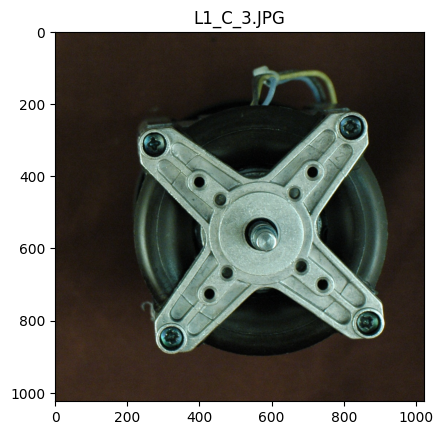

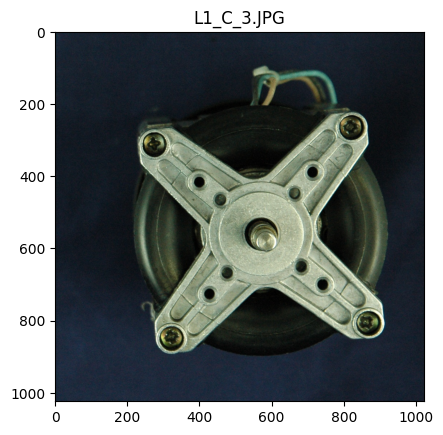

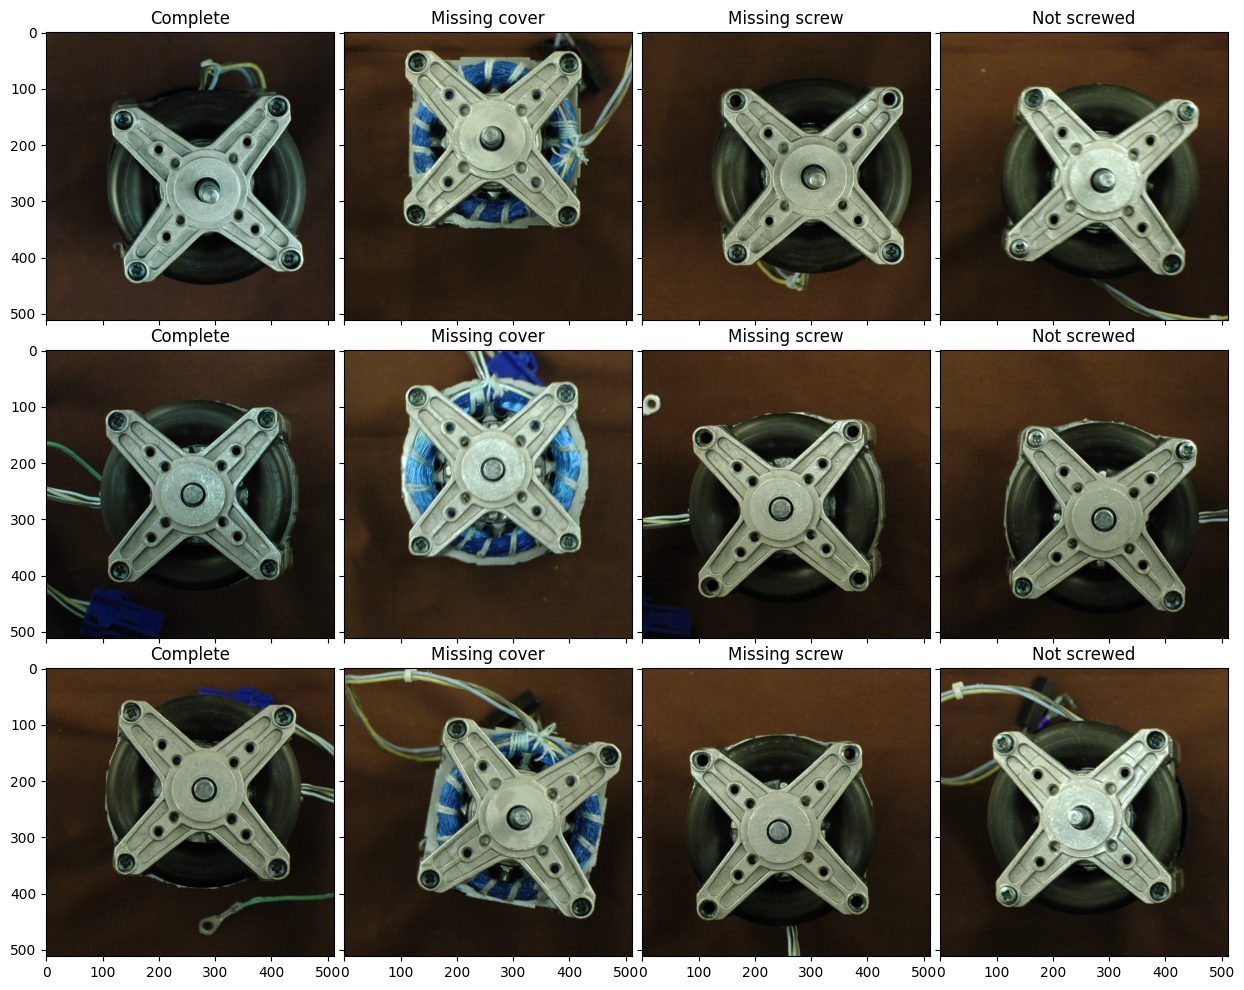

Counter({np.str_('Not screwed'): 47, np.str_('Missing screw'): 42, np.str_('Missing cover'): 22, np.str_('Complete'): 6})


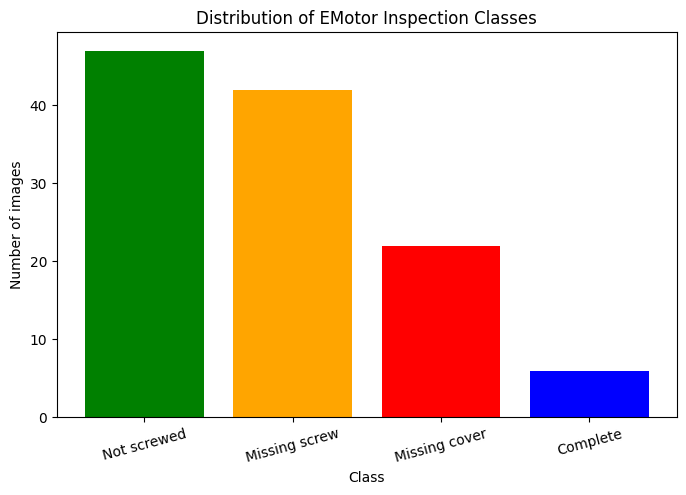

Shape feature vector: (70, 192)
Shape label vector: (70,)
Score: 0.6190476190476191
               precision    recall  f1-score   support

     Complete       0.00      0.00      0.00         2
Missing cover       0.00      0.00      0.00         6
Missing screw       0.62      1.00      0.76        13

     accuracy                           0.62        21
    macro avg       0.21      0.33      0.25        21
 weighted avg       0.38      0.62      0.47        21



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Shape feature vector: (70, 49152)
Shape label vector: (70,)
Label of first sample before OneHot encoding: Missing cover
Label of first sample after OneHot encoding: [0. 1. 0.]


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │     1,572,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            51 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 3)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,573,475 (6.00 MB)

 Trainable params: 1,573,475 (6.00 MB)

 Non-trainable params: 0 (0.00 B)

None


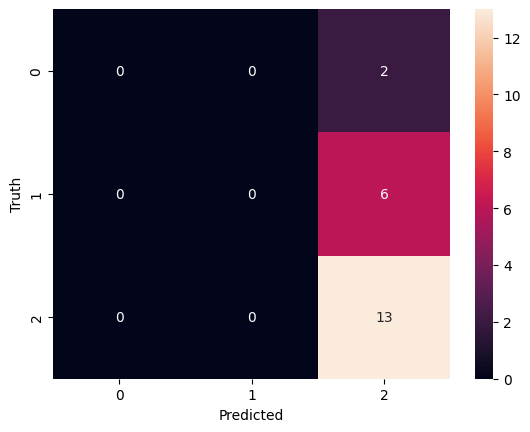

In [42]:
# Mounting the Gdrive
from google.colab import drive
from google.colab.patches import cv2_imshow
import sys, os
drive.mount('/content/gdrive', force_remount=True)

# Changing and adjusting the working directory = should be customized
dir_path = '/content/gdrive/My Drive/ML/Image_Classification/EMotor_Inspection'
sys.path.append(dir_path)
os.chdir(dir_path)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import cv2
import tensorflow as tf
# from scripts.check import *
!ls "/content/gdrive/My Drive/ML/Image_Classification/EMotor_Inspection/data"


#### Section 1.1: Data preprocessing
# Loading one image in the top view
path = "./data/top/L1_C_3.JPG"
img = cv2.imread(path)
img.shape
type(img)

# Now we want to plot the image
plt.title(path.split('/')[-1]) # Set the filename as image title
plt.imshow(img) # Display the image
plt.show()

# By default, open cv assumes the images are encoded in BGR.
# However, the actual order of the color channels is BRG. Thus, the channels need to be converted
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert image from bgr to rgb
plt.title(path.split('/')[-1]) # Set the filename as image title
plt.imshow(img) # Display the image
plt.show()

# 1: we need to load all the available images from the given data folder *folder*. Besides the image, we need to also find the class of the respective image.
#The information of the class is encoded in the title of each image. You can use the helper function `get_label_from_name(path)` to parse the filename to the class.

import glob

def get_label_from_name(path):
    if "_C_" in path:
        return "Complete"
    if "_MC_" in path:
        return "Missing cover"
    if "_MS_" in path:
        return "Missing screw"
    if "_NS_" in path:
        return "Not screwed"
    return "n/a" # TODO: Raise error



# Check data import
## quality_gate_111(features, labels)

####2 Image Processing.We haveloaded all images and labels before
#Before analyzing the images using machine learning, they need to be preprocessed. We will do preprocessing regarding three aspects:
#- **Image size**: As the raw images are available in rather high resolution, it might be beneficial to reduce the image resolution. Opencv provides the function `resize()` which works great for that purpose
#- **Image color**: In many use cases, the benefit of considering color information might not outway the increased complexity, thus it might be handy to convert the rgb image to bw. This can easily be done using the `cvtColor` function from opencv.
#- **Image shape**: Only some algorithms are capable of analyzing the 2.5D structure of image data. For the remaining algorithms, which expect the data to be 1D vector, the image data needs to be flattened from 2.5D to 1D. This can be done using the numpy `reshape` functionality.

def image_preprocessing(img, size=(64,32), flatten=True, color=False):
    # Resize
    img = cv2.resize(img, size)

    # Convert to grayscale if requested
    if not color and img.ndim == 3:  # only convert if image has 3 channels
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Flatten if requested
    if flatten:
        img = img.reshape(-1)

    return img

def load_features_labels(folder, size=(8,8), flatten=True, color=False, identifiers=['NS', 'MS', 'MC', 'C']):
    features, labels = [], []

    # Case-insensitive glob
    files = glob.glob(folder + "/*.JPG") + glob.glob(folder + "/*.jpg")

    for file in files:
        if any(identifier in file for identifier in identifiers):
            # Always load in color first (so preprocessing can handle conversion)
            img = cv2.imread(file, cv2.IMREAD_COLOR)
            if img is None:
                print(f"⚠️ Could not load {file}")
                continue

            # Apply preprocessing
            img_proc = image_preprocessing(img, size=size, flatten=flatten, color=color)

            features.append(img_proc)
            labels.append(get_label_from_name(file))

    return np.array(features), np.array(labels)

features, labels = load_features_labels("./data/top", size=(8, 8), flatten=True, color=False)


## Section 1.2: First data analysis
# Before diving into machine learning, we'll have a look at the data. With the snippet below you can visualize a sample of the image data available here.
# It can be observed that the class *missing cover* is rather distinct to the remaining classes, as the large black plastic cover is missing, exposing the copper wires. The defect *missing screw* is definitely harder to spot as the screws are rather small objects and the color difference between the screw and the empty hole is rather subtle. Finally, the defect *not screwed* can only be seen as some of the screws are not in the shade of the respective hole, thus indicating they are not screwed in all the way.

from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(16, 12))
grid = ImageGrid(fig, 111, nrows_ncols=(3, 4), axes_pad=(0.1, 0.3))

features, labels = load_features_labels("./data/top", size=(512, 512), flatten=False, color=True)
classes = ['Complete', 'Missing cover', 'Missing screw', 'Not screwed']
for i, ax in enumerate(grid):
    selectedClass = classes[i%4] # Select class
    images = np.array(features)[np.array(labels)==selectedClass] # Preselect images based on class
    image = images[i//4] # Select image
    ax.imshow(image) # Plot image
    ax.set_title(selectedClass) # Assign class as image title
plt.show()

#### First, let's investigate the distribution of the available images among the classes.
from collections import Counter
print(Counter(labels))

# Count the number of images in each class
label_counts = Counter(labels)
classes = list(label_counts.keys())
counts = list(label_counts.values())

# Create a bar plot
plt.figure(figsize=(8,5))
plt.bar(classes, counts, color=['green', 'orange', 'red', 'blue'])
plt.title("Distribution of EMotor Inspection Classes")
plt.ylabel("Number of images")
plt.xlabel("Class")
plt.xticks(rotation=15)
plt.show()

## We should analyze the result and see Which issues and challenges might appear during model training?

## Section 1.3: Image classification using Support Vector Machines
# In this section, we'll use Support Vector Machines (SVM) to try classifying the image dataset. For SVMs, it is necessary to have the data formatted as 1D vector.
# Also, we are only going to consider the three classes *complete*, *missing cover*, and *missing screws*.

features, labels = load_features_labels("./data/top", size=(8,8), color=True, flatten=True, identifiers=['MC', 'MS', 'C'])
features = np.asarray(features)
labels = np.asarray(labels)
print("Shape feature vector:", features.shape)
print("Shape label vector:", labels.shape)

# As we can see, we still load our 117 images, but the pixel values are now simply reshaped to 1D.
# Next, we need to separate our data into training and testing datasets. This can be achieved using the `train_test_split()` function from sklearn.
## in the following code so that 70% of the data is used for training, and the remaining 30% for testing. Also, the datasets should be stratified by the label vector.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features,        # feature vectors
    labels,          # corresponding labels
    test_size=0.3,   # 30% for testing
    stratify=labels, # maintain class proportions
    random_state=42  # for reproducibility
)

from sklearn.svm import SVC
from sklearn.utils.class_weight import compute_sample_weight
clf = SVC(kernel="rbf", gamma=0.01, C=1) # Initialize the SVM
clf.fit(X_train, y_train, sample_weight=compute_sample_weight('balanced', y_train)) # Train the SVM
print("Score:", clf.score(X_test, y_test)) # Test the model

# SVC → Support Vector Classifier from scikit-learn. It’s used for classification tasks.
# compute_sample_weight → calculates weights for each training sample to compensate for class imbalance.
# kernel="rbf" → Radial Basis Function kernel, a nonlinear kernel.
# gamma=0.01 → controls the influence of a single training example. Lower → more influence.
# C=0.0003 → regularization parameter. Lower C → more regularization (simpler model).
# These hyperparameters are very small. With 16×16 flattened images, we might need to tune them to get good accuracy.
# compute_sample_weight('balanced', y_train) → gives higher weight to samples from minority classes so the classifier does not ignore them.
# clf.fit(...) → trains the SVM on the weighted training data.
# clf.score(X_test, y_test) → computes the accuracy on the test set

import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, clf.predict(X_test))
ax=sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
print(classification_report(y_test, clf.predict(X_test)))

# Accuracy on test set = 62% → model correctly predicted 13 of 21 images.
# Support → number of images in test set for each class.
# Precision = correct predictions / total predicted as that class
# Recall = correct predictions / total true samples of that class

# Problems
# Class imbalance:
# Train labels likely dominated by "Missing screw"
# Even with sample_weight='balanced', SVM may still focus on majority class.
# Small dataset (70 training images):
# 3 classes → ~23 samples per class on average → too few for SVM to learn properly.
# Feature size (3072) is large for small dataset → model may overfit or underfit.
# Hyperparameters:
# C=0.0003, gamma=0.01. Even with c=1 nothing changed. with also 8*8 nothing.
# Very small C → SVM underfits → may predict only the largest class.
# Larger C → less regularization → better fitting
# Gamma → controls smoothness of decision boundary
# we need Data augmentation (rotate, flip, shift images) → increase training size
# or Use other classifiers: Random Forest, Logistic Regression, or even a small CNN if dataset grows.


##### Section 1.4: Image classification with artificial neural networks
# In this section, we will train our first artificial neural network (ANN) for image classification.
# First, we will have a look at normal ANNs. These consist of multiple dense layers which can analyze one-dimensional feature vectors.
# Thus, we need to reshape our 2.5-dimensional image data to 1D using the `flatten` option we integrated into our preprocessing function.

### a) Image classification using fully connected ANNs
# Again, we need to load the data using the `flatten=True` flag to convert the 2.5D data to 1D.

features, labels = load_features_labels("./data/top", size=(128,128), color=True, flatten=True, identifiers=['MC', 'MS', 'C'])
features = np.asarray(features)
labels = np.asarray(labels)
print("Shape feature vector:", features.shape)
print("Shape label vector:", labels.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features,        # feature vectors
    labels,          # corresponding labels
    test_size=0.3,   # 30% for testing, 70% for training
    stratify=labels, # maintain class proportions
    random_state=42  # for reproducibility
)

# The labels need to be *one hot encoded*. In one hot encoding, categorical values are transformed into a binary representation.
# The sklearn preprocessing library contains a variety of useful data preprocessing tools such as one hot encoding
from sklearn.preprocessing import OneHotEncoder
# Display the first label before encoding
print("Label of first sample before OneHot encoding:", y_train[0])
# Create the encoder object
enc = OneHotEncoder(sparse_output=False) # Generate Encoder
# With the fit_transform function, the encoder is fitted to the existing labels and transforms the dataset into its binary representation
y_train = enc.fit_transform(y_train.reshape(-1, 1))
# Display the first label after encoding
print("Label of first sample after OneHot encoding:", y_train[0])
# Data preprocessing should always be fitted on the training dataset, but applied to both, the training and the testing dataset. Thus the fit_transform function is only applied to the training dataset, while the the test dataset is transformed using the transform function and the fitted preprocessing module
y_test = enc.transform(y_test.reshape(-1, 1))

# Now, let's define a simple ANN with an input layer, 3 hidden layer and one output layer.
# Here we use the **keras** library to model the neural network.
# A simple ANN with multiple sequential layers can be created using the `Sequential()` model.
# Afterwards, various layers can be added to the model through the command `model.add(LAYER)` with *LAYER* defining the layer to be added.
# In the first layer, the shape of the input needs to be specified using the parameter `input_shape`. This is only necessary in the first, but not in consecutive layers.

from keras.models import Sequential
from keras.layers import Dense, Activation, Input, Dropout

model = Sequential()
model.add(Dense(32, input_shape = X_train[0].shape))
model.add(Activation("relu"))
model.add(Dense(16))
model.add(Activation("relu"))
model.add(Dense(y_train[0].shape[0]))
model.add(Activation("softmax"))

print(model.summary())

# Param # (Parameters)
# Dense layer → parameters = (input_features × neurons) + neurons (bias).
# First dense layer:
# input features = 128*128*3 = 49152
# neurons = 32
# params = 49152*32 + 32 = 1,572,896
# Second dense layer:
# input features = 32
# neurons = 16
# params = 32*16 + 16 = 528
# Output layer:
# input features = 16
# neurons = 3
# params = 16*3 + 3 = 51
# Activation layers have 0 parameters because they just apply a function to the output.

#### Next, the model needs to be compiled using a `loss` function and an `optimizer`.
# The loss function defines how the loss is computed during model training, while the optimizer defines how the weights need to be adjusted during backpropagation

model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
# Now, the model can be trained using the datasets defined before.
# Adam = adaptive learning rate optimization algorithm.
# Combines the benefits of Momentum and RMSProp.
# Good default choice for most problems.
# Accuracy → fraction of correctly classified samples. Keras will report accuracy during training and evaluation.

model.fit(X_train, y_train, epochs = 20, batch_size = 8, validation_split=0.2, verbose = 1)
# model.fit(...) trains your neural network on the training data
# epochs=20 → the model will go through the dataset 20 times
# batch_size=8 → training is done in mini-batches of 8 samples, not the whole dataset at once
# validation_split=0.2 → 20% of training data is set aside for validation, so the model doesn’t train on it
# verbose=1 → prints a progress bar and metrics during training
# For each batch:
# Forward pass → compute predicted outputs
# Compute loss → compare predicted vs true labels
# Backward pass → update weights using optimizer
# After all batches → compute average training loss & accuracy
# Compute validation loss & accuracy on the 20% validation split
# Epoch = one complete pass through your entire training dataset.
# If you set epochs=1, the model sees each training sample only once.
# With 70 training samples, one epoch is usually not enough for the model to learn meaningful patterns.
# Each epoch allows the network to refine its weights further.
